# CO2 Emission prediction in Greater London Area from LAEI 2013 dataset

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor 
from sklearn.ensemble        import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
df_c02         = pd.read_excel('LAEI2013_Emissions_Summary-CO2_v1.1.xlsx', engine = 'openpyxl', sheet_name = 1, header = 1, skiprows = 2).query("Year == 2013")
df_c02.columns = df_c02.columns.str.replace(' ', '_') 
df_c02.head()

,Year,LAEI_1km2_ID,GRID_ExactCut_ID,Easting,Northing,Borough,Zone,Household_and_Garden,Small_Waste_and_Accidental_Fires,Agriculture,...,Diesel_Car,Electric_Car,Petrol_LGV,Diesel_LGV,Electric_LGV,TfL_Bus,Non-TfL_Bus_and_Coach,Artic_HGV,Rigid_HGV,Total
6710,2013,5910,1,510500,203500,NonGLA,NonGLA,0,0,0,...,31.009361,0,0.247012,11.142148,0,1.866641,2.119227,1.032639,6.620063,657.304039
6711,2013,5911,2,511500,203500,NonGLA,NonGLA,0,0,0,...,3629.820262,0,48.949518,2136.423703,0,74.311546,180.493117,2443.494624,1071.847896,14568.389161
6712,2013,5912,3,512500,203500,NonGLA,NonGLA,0,0,0,...,1895.523415,0,26.183085,1063.221961,0,11.043148,75.213400,1697.340408,603.291676,8034.721767
6713,2013,5915,4,515500,203500,NonGLA,NonGLA,0,0,0,...,30.907046,0,0.246190,11.105096,0,1.860839,2.112639,1.025461,6.598140,9313.431445
6714,2013,5916,5,516500,203500,NonGLA,NonGLA,0,0,0,...,27.905954,0,0.222296,10.027279,0,1.678366,1.905475,0.927474,5.957539,4275.182041


In [3]:
len(df_c02)

3355

In [4]:
df_c02.isnull().sum()

Year                                0
LAEI_1km2_ID                        0
GRID_ExactCut_ID                    0
Easting                             0
Northing                            0
Borough                             0
Zone                                0
Household_and_Garden                0
Small_Waste_and_Accidental_Fires    0
Agriculture                         0
STW                                 0
WTS                                 0
Landfill                            0
NRMM_Construction                   0
NRMM_Industry                       0
C&D_Dust                            0
Domestic_Gas                        0
Commercial_Gas                      0
Domestic_Other_Fuels                0
Commercial_Other_Fuels              0
Industry_Part_A                     0
Industry_Part_B                     0
Aviation                            0
Passenger_Shipping                  0
Commercial_Shipping                 0
Rail_Freight                        0
Rail_Passeng

In [6]:
df_major_roads_traffic         = pd.read_excel('LAEI2013_2013_AADT-VKM.xlsx', engine = 'openpyxl', sheet_name = 1)
df_major_roads_traffic.columns = df_major_roads_traffic.columns.str.replace(' ', '_').str.replace('(', '', regex = True).str.replace(')', '', regex = True)

df_minor_roads_traffic         = pd.read_excel('LAEI2013_2013_AADT-VKM.xlsx', engine = 'openpyxl', sheet_name = 2)
df_minor_roads_traffic.columns = df_minor_roads_traffic.columns.str.replace(' ', '_').str.replace('(', '', regex = True).str.replace(')', '', regex = True)

In [7]:
df_major_roads_traffic.columns

Index(['RowID', 'Year', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'TLRN', 'MotorwayNumber', 'AADT_Motorcycle',
       'AADT_Taxi', 'AADT_Pcar', 'AADT_Dcar', 'AADT_PLgv', 'AADT_DLgv',
       'AADT_LtBus', 'AADT_Coach', 'AADT_Rigid2Axle', 'AADT_Rigid3Axle',
       'AADT_Rigid4Axle', 'AADT_Artic3Axle', 'AADT_Artic5Axle',
       'AADT_Artic6Axle', 'AADT_ElectricCar', 'AADT_ElectricLgv', 'AADT_TOTAL',
       'Speed_kph', 'Length_m', 'VKM_Motorcycle', 'VKM_Taxi', 'VKM_Pcar',
       'VKM_Dcar', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus', 'VKM_Coach',
       'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
       'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar',
       'VKM_ElectricLgv', 'VKM_TOTAL'],
      dtype='object')

In [8]:
len(df_major_roads_traffic)

87999

In [9]:
df_major_roads_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87999 entries, 0 to 87998
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowID                 87996 non-null  float64
 1   Year                  87996 non-null  float64
 2   Toid                  87996 non-null  float64
 3   GRID_ExactCut_ID      87996 non-null  float64
 4   Location_ExactCut     87996 non-null  object 
 5   BoroughName_ExactCut  87996 non-null  object 
 6   TLRN                  87996 non-null  object 
 7   MotorwayNumber        87996 non-null  object 
 8   AADT_Motorcycle       87996 non-null  float64
 9   AADT_Taxi             87996 non-null  float64
 10  AADT_Pcar             87996 non-null  float64
 11  AADT_Dcar             87996 non-null  float64
 12  AADT_PLgv             87996 non-null  float64
 13  AADT_DLgv             87996 non-null  float64
 14  AADT_LtBus            87996 non-null  float64
 15  AADT_Coach         

In [10]:
df_major_roads_traffic.head()

,RowID,Year,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,TLRN,MotorwayNumber,AADT_Motorcycle,AADT_Taxi,...,VKM_Coach,VKM_Rigid2Axle,VKM_Rigid3Axle,VKM_Rigid4Axle,VKM_Artic3Axle,VKM_Artic5Axle,VKM_Artic6Axle,VKM_ElectricCar,VKM_ElectricLgv,VKM_TOTAL
0,1.0,2013.0,4.000000e+15,836.0,Outer,Hillingdon,Other,Other,88.301916,77.112580,...,149.248696,293.680300,55.978941,39.030966,16.191367,10.970609,3.993946,4.335614,1.235289,16605.011414
1,2.0,2013.0,4.000000e+15,2217.0,Outer,Hillingdon,Other,Other,88.301916,77.112580,...,98.338925,193.503902,36.884134,25.717231,10.668379,7.228458,2.631583,2.856706,0.813924,10940.494996
2,3.0,2013.0,4.000000e+15,282.0,External,NonGLA,Other,Other,310.363572,100.322495,...,1657.075319,12950.212101,3011.364039,2861.551314,1710.809301,1966.897025,1647.110606,221.806380,47.635028,796735.125068
3,4.0,2013.0,4.000000e+15,873.0,Outer,Hillingdon,Other,Other,39.473081,144.548284,...,118.008843,9777.985094,2051.227418,1024.275647,470.758531,815.631678,1959.389833,78.775616,15.287825,284144.265992
4,5.0,2013.0,4.000000e+15,2930.0,Outer,Hillingdon,Other,Other,39.473081,144.548284,...,401.216526,33244.027352,6973.937855,3482.419671,1600.524988,2773.054115,6661.700602,267.828056,51.976850,966057.900401


In [11]:
df_major_roads_traffic.isnull().sum()

RowID                   3
Year                    3
Toid                    3
GRID_ExactCut_ID        3
Location_ExactCut       3
BoroughName_ExactCut    3
TLRN                    3
MotorwayNumber          3
AADT_Motorcycle         3
AADT_Taxi               3
AADT_Pcar               3
AADT_Dcar               3
AADT_PLgv               3
AADT_DLgv               3
AADT_LtBus              3
AADT_Coach              3
AADT_Rigid2Axle         3
AADT_Rigid3Axle         3
AADT_Rigid4Axle         3
AADT_Artic3Axle         3
AADT_Artic5Axle         3
AADT_Artic6Axle         3
AADT_ElectricCar        3
AADT_ElectricLgv        3
AADT_TOTAL              3
Speed_kph               2
Length_m                2
VKM_Motorcycle          3
VKM_Taxi                3
VKM_Pcar                3
VKM_Dcar                3
VKM_PLgv                3
VKM_DLgv                3
VKM_LtBus               3
VKM_Coach               3
VKM_Rigid2Axle          3
VKM_Rigid3Axle          3
VKM_Rigid4Axle          3
VKM_Artic3Ax

In [12]:
df_major_roads_traffic[df_major_roads_traffic['RowID'].isnull()]
df_major_roads_traffic = df_major_roads_traffic.dropna(subset=['RowID'])

In [13]:
duplicateRows = df_major_roads_traffic[df_major_roads_traffic.duplicated()]
print("There is " + str(len(duplicateRows)) + " duplicated rows")

There is 0 duplicated rows


In [14]:
len(df_major_roads_traffic)

87996

In [15]:
df_major_roads_traffic.isnull().sum()

RowID                   0
Year                    0
Toid                    0
GRID_ExactCut_ID        0
Location_ExactCut       0
BoroughName_ExactCut    0
TLRN                    0
MotorwayNumber          0
AADT_Motorcycle         0
AADT_Taxi               0
AADT_Pcar               0
AADT_Dcar               0
AADT_PLgv               0
AADT_DLgv               0
AADT_LtBus              0
AADT_Coach              0
AADT_Rigid2Axle         0
AADT_Rigid3Axle         0
AADT_Rigid4Axle         0
AADT_Artic3Axle         0
AADT_Artic5Axle         0
AADT_Artic6Axle         0
AADT_ElectricCar        0
AADT_ElectricLgv        0
AADT_TOTAL              0
Speed_kph               0
Length_m                0
VKM_Motorcycle          0
VKM_Taxi                0
VKM_Pcar                0
VKM_Dcar                0
VKM_PLgv                0
VKM_DLgv                0
VKM_LtBus               0
VKM_Coach               0
VKM_Rigid2Axle          0
VKM_Rigid3Axle          0
VKM_Rigid4Axle          0
VKM_Artic3Ax

In [16]:
df_major_roads_traffic['GRID_ExactCut_ID'] = df_major_roads_traffic['GRID_ExactCut_ID'].astype(int)

In [17]:
cols = ['RowID', 'Year', 'Toid', 'GRID_ExactCut_ID']
df_major_roads_traffic[cols] = df_major_roads_traffic[cols].astype(str)
df_major_roads_traffic.describe(include='all')

,RowID,Year,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,TLRN,MotorwayNumber,AADT_Motorcycle,AADT_Taxi,...,VKM_Coach,VKM_Rigid2Axle,VKM_Rigid3Axle,VKM_Rigid4Axle,VKM_Artic3Axle,VKM_Artic5Axle,VKM_Artic6Axle,VKM_ElectricCar,VKM_ElectricLgv,VKM_TOTAL
count,87996,87996,87996,87996,87996,87996,87996,87996,87996.000000,87996.000000,...,87996.000000,87996.000000,87996.000000,87996.000000,87996.000000,87996.000000,8.799600e+04,87996.000000,87996.000000,8.799600e+04
unique,87996,1,78594,2820,4,34,2,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1.0,2013.0,4000000030074798.0,3305,Outer,NonGLA,Other,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,87996,7,247,46511,14394,75690,85599,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.031065,479.653134,...,2332.049529,10399.356523,1573.629261,2256.344914,710.021035,2790.391587,5.575254e+03,87.285352,21.404102,4.435183e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403.487528,920.988040,...,9178.421136,35366.719054,7174.725060,10459.529349,4053.343119,26002.493146,5.443602e+04,222.983362,61.232812,1.489505e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.817276,66.035610,...,0.000000,841.388538,71.449590,75.780881,13.162169,26.216026,1.713510e+01,9.773787,2.114018,4.301005e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.912229,144.742275,...,49.501534,2701.961309,276.386425,311.882873,85.730751,138.018116,1.166513e+02,29.642530,6.664466,1.250485e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.146554,391.327422,...,1207.045310,7698.327749,854.578021,1042.002505,323.595754,512.713280,4.833723e+02,83.109491,18.888101,3.460739e+05


In [18]:
df_major_roads_traffic = df_major_roads_traffic.loc[:,~df_major_roads_traffic.columns.str.startswith('AADT')]

In [19]:
df_major_roads_traffic['VKM_Rigid'] = df_major_roads_traffic['VKM_Rigid2Axle'] + df_major_roads_traffic['VKM_Rigid3Axle'] + df_major_roads_traffic['VKM_Rigid4Axle']
df_major_roads_traffic['VKM_Artic'] = df_major_roads_traffic['VKM_Artic3Axle'] + df_major_roads_traffic['VKM_Artic5Axle'] + df_major_roads_traffic['VKM_Artic6Axle']

In [20]:
df_major_roads_traffic = df_major_roads_traffic.drop(['VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle', 'VKM_Artic5Axle', 'VKM_Artic6Axle'], axis = 1)

In [21]:
df_major_roads_traffic.rename(columns={'VKM_Pcar'        : 'VKM_Petrolcar',
                                       'VKM_Dcar'        : 'VKM_Dieselcar',
                                       'VKM_PLgv'        : 'VKM_Petrollgv',
                                       'VKM_DLgv'        : 'VKM_Diesellgv',
                                       'VKM_LtBus'       : 'VKM_Bus',
                                       'VKM_TOTAL'       : 'VKM_Total',
                                       'VKM_ElectricCar' : 'VKM_Electriccar',
                                       'VKM_ElectricLgv' : 'VKM_Electriclgv',
                                       'Speed_kph'       : 'speed_kph'
                                       },
                             inplace = True)

In [22]:
df_major_roads_traffic = df_major_roads_traffic.drop(['RowID', 'Toid', 'TLRN', 'MotorwayNumber', 'Length_m'], axis = 1)

In [23]:
df_major_roads_traffic = df_major_roads_traffic[['Year', 'GRID_ExactCut_ID', 'Location_ExactCut', 'BoroughName_ExactCut', 'speed_kph',\
                                                'VKM_Motorcycle', 'VKM_Taxi', 'VKM_Bus', 'VKM_Coach', 'VKM_Rigid', 'VKM_Artic', 'VKM_Petrolcar',\
                                                'VKM_Dieselcar', 'VKM_Electriccar', 'VKM_Petrollgv', 'VKM_Diesellgv', 'VKM_Electriclgv', 'VKM_Total']]
                                                

In [24]:
df_major_roads_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87996 entries, 0 to 87995
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  87996 non-null  object 
 1   GRID_ExactCut_ID      87996 non-null  object 
 2   Location_ExactCut     87996 non-null  object 
 3   BoroughName_ExactCut  87996 non-null  object 
 4   speed_kph             87996 non-null  float64
 5   VKM_Motorcycle        87996 non-null  float64
 6   VKM_Taxi              87996 non-null  float64
 7   VKM_Bus               87996 non-null  float64
 8   VKM_Coach             87996 non-null  float64
 9   VKM_Rigid             87996 non-null  float64
 10  VKM_Artic             87996 non-null  float64
 11  VKM_Petrolcar         87996 non-null  float64
 12  VKM_Dieselcar         87996 non-null  float64
 13  VKM_Electriccar       87996 non-null  float64
 14  VKM_Petrollgv         87996 non-null  float64
 15  VKM_Diesellgv      

In [25]:
len(df_minor_roads_traffic)

3355

In [26]:
df_minor_roads_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  3355 non-null   int64  
 1   ID                    3355 non-null   int64  
 2   GRID_ExactCut_ID      3355 non-null   int64  
 3   Location_ExactCut     3355 non-null   object 
 4   BoroughName_ExactCut  3355 non-null   object 
 5   Easting               3355 non-null   int64  
 6   Northing              3355 non-null   int64  
 7   speed_kph             3355 non-null   int64  
 8   VKM_Motorcycle        3355 non-null   float64
 9   VKM_Taxi              3355 non-null   float64
 10  VKM_Bus               3355 non-null   float64
 11  VKM_Coach             3355 non-null   float64
 12  VKM_Rigid             3355 non-null   float64
 13  VKM_Artic             3355 non-null   float64
 14  VKM_Petrolcar         3355 non-null   float64
 15  VKM_Dieselcar        

In [27]:
df_minor_roads_traffic.head()

,Year,ID,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Easting,Northing,speed_kph,VKM_Motorcycle,VKM_Taxi,...,VKM_Coach,VKM_Rigid,VKM_Artic,VKM_Petrolcar,VKM_Dieselcar,VKM_Electriccar,VKM_Petrollgv,VKM_Diesellgv,VKM_Electriclgv,VKM_Total
0,2013,5910,1,External,NonGLA,510500,203500,30,7223.168225,3303.116745,...,4513.072361,7680.054517,853.427764,309599.517097,183701.922502,164.155952,1083.285552,54429.435225,31.158503,572582.314443
1,2013,5911,2,External,NonGLA,511500,203500,30,4742.141375,2167.935313,...,2962.995481,5041.590112,559.699517,203270.767843,120611.398853,107.778290,711.243897,35736.287198,20.457482,375932.295360
2,2013,5912,3,External,NonGLA,512500,203500,30,7278.285529,3327.995491,...,4548.852095,7740.195812,860.663552,312015.145930,185135.244055,165.436767,1091.752757,54854.868005,31.402045,577049.842037
3,2013,5915,4,External,NonGLA,515500,203500,30,7204.224780,3294.143071,...,4499.043482,7654.621079,847.495192,308578.002296,183095.803234,163.614324,1079.683190,54248.435380,31.054888,570696.120915
4,2013,5916,5,External,NonGLA,516500,203500,30,6499.471249,2972.477278,...,4057.870123,6911.448474,766.513286,278614.894550,165317.091727,147.727276,974.893390,48983.295782,28.040823,515273.723959


In [28]:
df_minor_roads_traffic.isnull().sum()

Year                    0
ID                      0
GRID_ExactCut_ID        0
Location_ExactCut       0
BoroughName_ExactCut    0
Easting                 0
Northing                0
speed_kph               0
VKM_Motorcycle          0
VKM_Taxi                0
VKM_Bus                 0
VKM_Coach               0
VKM_Rigid               0
VKM_Artic               0
VKM_Petrolcar           0
VKM_Dieselcar           0
VKM_Electriccar         0
VKM_Petrollgv           0
VKM_Diesellgv           0
VKM_Electriclgv         0
VKM_Total               0
dtype: int64

In [29]:
cols = ['Year', 'ID', 'GRID_ExactCut_ID']
df_minor_roads_traffic[cols] = df_minor_roads_traffic[cols].astype(str)

In [30]:
df_minor_roads_traffic.describe(include='all')

,Year,ID,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Easting,Northing,speed_kph,VKM_Motorcycle,VKM_Taxi,...,VKM_Coach,VKM_Rigid,VKM_Artic,VKM_Petrolcar,VKM_Dieselcar,VKM_Electriccar,VKM_Petrollgv,VKM_Diesellgv,VKM_Electriclgv,VKM_Total
count,3355,3355,3355,3355,3355,3355.000000,3355.000000,3355.00000,3355.000000,3355.000000,...,3355.000000,3355.000000,3355.000000,3.355000e+03,3.355000e+03,3355.000000,3355.000000,3355.000000,3355.000000,3.355000e+03
unique,1,2466,3355,4,34,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2013,9889,1,Outer,NonGLA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3355,6,1,1766,1010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,529707.451565,178835.618480,28.93234,24268.334489,15743.834205,...,6907.519757,21607.891433,2395.633890,7.595515e+05,4.506824e+05,402.729624,2857.274427,143563.101211,82.183680,1.443855e+06
std,NaN,NaN,NaN,NaN,NaN,14688.878533,12556.159991,2.52664,31679.697563,36121.710430,...,9235.614347,21630.650740,2391.880815,6.898642e+05,4.093333e+05,365.780018,2683.751660,134844.489369,77.192651,1.315523e+06
min,NaN,NaN,NaN,NaN,NaN,501500.000000,152500.000000,18.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,517500.000000,169500.000000,30.00000,3928.713612,1884.331457,...,0.000000,4011.128048,445.558430,1.544532e+05,9.164531e+04,81.894210,560.205215,28147.383128,16.113162,2.912316e+05
50%,NaN,NaN,NaN,NaN,NaN,529500.000000,179500.000000,30.00000,14380.646045,6887.264684,...,3031.316868,14639.216023,1624.210420,5.473559e+05,3.247755e+05,290.219214,2011.442660,101064.477189,57.855052,1.032572e+06
75%,NaN,NaN,NaN,NaN,NaN,541500.000000,188500.000000,30.00000,33785.048736,16223.996597,...,10547.113086,34593.831345,3835.171927,1.300713e+06,7.717828e+05,689.664712,4742.600577,238290.883108,136.411247,2.466122e+06


In [31]:
df_minor_roads_traffic = df_minor_roads_traffic.drop(['ID', 'Easting', 'Northing'], axis = 1)

In [32]:
df_minor_roads_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  3355 non-null   object 
 1   GRID_ExactCut_ID      3355 non-null   object 
 2   Location_ExactCut     3355 non-null   object 
 3   BoroughName_ExactCut  3355 non-null   object 
 4   speed_kph             3355 non-null   int64  
 5   VKM_Motorcycle        3355 non-null   float64
 6   VKM_Taxi              3355 non-null   float64
 7   VKM_Bus               3355 non-null   float64
 8   VKM_Coach             3355 non-null   float64
 9   VKM_Rigid             3355 non-null   float64
 10  VKM_Artic             3355 non-null   float64
 11  VKM_Petrolcar         3355 non-null   float64
 12  VKM_Dieselcar         3355 non-null   float64
 13  VKM_Electriccar       3355 non-null   float64
 14  VKM_Petrollgv         3355 non-null   float64
 15  VKM_Diesellgv        

In [33]:
df_merged = df_major_roads_traffic.append(df_minor_roads_traffic, ignore_index = True).drop('Year', axis = 1)

C:\Users\eleni\AppData\Local\Temp\ipykernel_17164\2039191390.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df_major_roads_traffic.append(df_minor_roads_traffic, ignore_index = True).drop('Year', axis = 1)


In [34]:
df_merged.query("GRID_ExactCut_ID == '2930'")

,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,speed_kph,VKM_Motorcycle,VKM_Taxi,VKM_Bus,VKM_Coach,VKM_Rigid,VKM_Artic,VKM_Petrolcar,VKM_Dieselcar,VKM_Electriccar,VKM_Petrollgv,VKM_Diesellgv,VKM_Electriclgv,VKM_Total
4,2930,Outer,Hillingdon,49.173100,2586.248957,9470.703474,1096.887173,401.216526,43700.384878,11035.279705,505125.983487,299718.213847,267.828056,1807.075618,90796.101831,51.976850,966057.900401
7,2930,Outer,Hillingdon,56.910225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2930,Outer,Hillingdon,16.776559,3393.460236,58157.197549,2339.962744,19254.417068,10193.677710,414.140334,545784.361032,323842.999928,289.385953,429.960803,21603.282395,12.366947,985715.212699
9,2930,Outer,Hillingdon,29.278823,3447.648393,6146.661759,1499.942986,4550.399186,20257.450209,3742.500581,327217.112038,194155.382155,173.497159,774.456194,38912.374635,22.275655,600899.700949
19,2930,Outer,Hillingdon,37.387537,1902.920084,3392.633117,827.889421,2511.580363,11181.044141,2065.662942,180606.588473,107163.531229,95.761281,427.458974,21477.578567,12.294987,331664.943581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58645,2930,Outer,Hillingdon,43.144959,6958.515080,8061.201965,9076.148197,0.000000,29026.545079,6641.937708,233192.956875,138365.831102,123.643642,806.964411,40545.742592,23.210688,472822.697339
74453,2930,Outer,Hillingdon,46.866796,5723.696977,6630.707383,7465.547089,0.000000,23875.661174,5463.297606,191811.874656,113812.225753,101.702552,663.765144,33350.728084,19.091853,388918.298270
78892,2930,Outer,Hillingdon,48.649291,7730.695504,8955.746601,10083.320543,0.000000,32247.595779,7378.987813,259070.178389,153720.168168,137.364270,896.512557,45045.068715,25.786358,525291.424697
85072,2930,Outer,Hillingdon,16.280940,7279.644048,8433.218901,9495.003953,0.000000,30366.093005,6948.456925,243954.593883,144751.284885,129.349680,844.205065,42416.890717,24.281839,494643.022901


In [35]:
df_c02.query("GRID_ExactCut_ID == 2930")

,Year,LAEI_1km2_ID,GRID_ExactCut_ID,Easting,Northing,Borough,Zone,Household_and_Garden,Small_Waste_and_Accidental_Fires,Agriculture,...,Diesel_Car,Electric_Car,Petrol_LGV,Diesel_LGV,Electric_LGV,TfL_Bus,Non-TfL_Bus_and_Coach,Artic_HGV,Rigid_HGV,Total
9639,2013,10207,2930,507500,178500,Hillingdon,Outer,0,0,0,...,4348.048168,0,30.748812,1638.836089,0,257.939306,846.483966,634.591627,1522.903693,31157.67966


In [36]:
df_roads_agg = df_merged.groupby(['GRID_ExactCut_ID','Location_ExactCut', 'BoroughName_ExactCut']).agg(
                                                                                                       speed_kph       = ('speed_kph',        'mean'),
                                                                                                       VKM_Motorcycle  = ('VKM_Motorcycle',   'sum'),
                                                                                                       VKM_Taxi        = ('VKM_Taxi',         'sum'),
                                                                                                       VKM_Bus         = ('VKM_Bus',          'sum'),
                                                                                                       VKM_Coach       = ('VKM_Coach',        'sum'),
                                                                                                       VKM_Rigid       = ('VKM_Rigid',        'sum'),
                                                                                                       VKM_Artic       = ('VKM_Artic',        'sum'),
                                                                                                       VKM_Petrolcar   = ('VKM_Petrolcar',    'sum'),
                                                                                                       VKM_Dieselcar   = ('VKM_Dieselcar',    'sum'),
                                                                                                       VKM_Electriccar = ('VKM_Electriccar',  'sum'),
                                                                                                       VKM_Petrollgv   = ('VKM_Petrollgv',    'sum'),
                                                                                                       VKM_Diesellgv   = ('VKM_Diesellgv',    'sum'),
                                                                                                       VKM_Electriclgv = ('VKM_Electriclgv',  'sum'),
                                                                                                       VKM_Total       = ('VKM_Total',        'sum')
                                                                                                        ).reset_index()

In [37]:
df_roads_agg.query("GRID_ExactCut_ID == '2930'")

,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,speed_kph,VKM_Motorcycle,VKM_Taxi,VKM_Bus,VKM_Coach,VKM_Rigid,VKM_Artic,VKM_Petrolcar,VKM_Dieselcar,VKM_Electriccar,VKM_Petrollgv,VKM_Diesellgv,VKM_Electriclgv,VKM_Total
2146,2930,Outer,Hillingdon,36.527374,733793.468365,2.284047e+06,262307.098236,962811.5601,2.468658e+06,628749.519311,4.823395e+07,2.861978e+07,25574.617543,141408.995766,7.105063e+06,4067.341768,9.147020e+07


In [38]:
df_roads_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GRID_ExactCut_ID      3355 non-null   object 
 1   Location_ExactCut     3355 non-null   object 
 2   BoroughName_ExactCut  3355 non-null   object 
 3   speed_kph             3355 non-null   float64
 4   VKM_Motorcycle        3355 non-null   float64
 5   VKM_Taxi              3355 non-null   float64
 6   VKM_Bus               3355 non-null   float64
 7   VKM_Coach             3355 non-null   float64
 8   VKM_Rigid             3355 non-null   float64
 9   VKM_Artic             3355 non-null   float64
 10  VKM_Petrolcar         3355 non-null   float64
 11  VKM_Dieselcar         3355 non-null   float64
 12  VKM_Electriccar       3355 non-null   float64
 13  VKM_Petrollgv         3355 non-null   float64
 14  VKM_Diesellgv         3355 non-null   float64
 15  VKM_Electriclgv      

In [39]:
df_c02.head()

,Year,LAEI_1km2_ID,GRID_ExactCut_ID,Easting,Northing,Borough,Zone,Household_and_Garden,Small_Waste_and_Accidental_Fires,Agriculture,...,Diesel_Car,Electric_Car,Petrol_LGV,Diesel_LGV,Electric_LGV,TfL_Bus,Non-TfL_Bus_and_Coach,Artic_HGV,Rigid_HGV,Total
6710,2013,5910,1,510500,203500,NonGLA,NonGLA,0,0,0,...,31.009361,0,0.247012,11.142148,0,1.866641,2.119227,1.032639,6.620063,657.304039
6711,2013,5911,2,511500,203500,NonGLA,NonGLA,0,0,0,...,3629.820262,0,48.949518,2136.423703,0,74.311546,180.493117,2443.494624,1071.847896,14568.389161
6712,2013,5912,3,512500,203500,NonGLA,NonGLA,0,0,0,...,1895.523415,0,26.183085,1063.221961,0,11.043148,75.213400,1697.340408,603.291676,8034.721767
6713,2013,5915,4,515500,203500,NonGLA,NonGLA,0,0,0,...,30.907046,0,0.246190,11.105096,0,1.860839,2.112639,1.025461,6.598140,9313.431445
6714,2013,5916,5,516500,203500,NonGLA,NonGLA,0,0,0,...,27.905954,0,0.222296,10.027279,0,1.678366,1.905475,0.927474,5.957539,4275.182041


In [40]:
df_c02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3355 entries, 6710 to 10064
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              3355 non-null   int64  
 1   LAEI_1km2_ID                      3355 non-null   int64  
 2   GRID_ExactCut_ID                  3355 non-null   int64  
 3   Easting                           3355 non-null   int64  
 4   Northing                          3355 non-null   int64  
 5   Borough                           3355 non-null   object 
 6   Zone                              3355 non-null   object 
 7   Household_and_Garden              3355 non-null   int64  
 8   Small_Waste_and_Accidental_Fires  3355 non-null   int64  
 9   Agriculture                       3355 non-null   int64  
 10  STW                               3355 non-null   object 
 11  WTS                               3355 non-null   int64  
 12  La

In [41]:
df_c02['GRID_ExactCut_ID'] = df_c02['GRID_ExactCut_ID'].astype(str)
df = pd.merge(df_c02[['GRID_ExactCut_ID', 'Borough', 'Total']], df_roads_agg, left_on=['GRID_ExactCut_ID', 'Borough'], right_on=['GRID_ExactCut_ID', 'BoroughName_ExactCut'], how = 'left')

In [42]:
len(df)

3355

In [43]:
df.isnull().sum()

GRID_ExactCut_ID        0
Borough                 0
Total                   0
Location_ExactCut       0
BoroughName_ExactCut    0
speed_kph               0
VKM_Motorcycle          0
VKM_Taxi                0
VKM_Bus                 0
VKM_Coach               0
VKM_Rigid               0
VKM_Artic               0
VKM_Petrolcar           0
VKM_Dieselcar           0
VKM_Electriccar         0
VKM_Petrollgv           0
VKM_Diesellgv           0
VKM_Electriclgv         0
VKM_Total               0
dtype: int64

In [44]:
df.rename(columns={'Total' : 'Total_C02'}, inplace = True)
df = df.drop(['GRID_ExactCut_ID', 'BoroughName_ExactCut', 'Borough'], axis = 1)
df['Location_ExactCut'].value_counts()

Outer       1766
External    1010
Inner        515
Central       64
Name: Location_ExactCut, dtype: int64

In [45]:
df = pd.get_dummies(df, columns = ['Location_ExactCut'])
df = df.drop(['Location_ExactCut_Central'], axis = 1)

In [46]:
variables = ['VKM_Motorcycle', 'VKM_Taxi', 'VKM_Bus', 'VKM_Coach', 'VKM_Rigid', 'VKM_Artic']

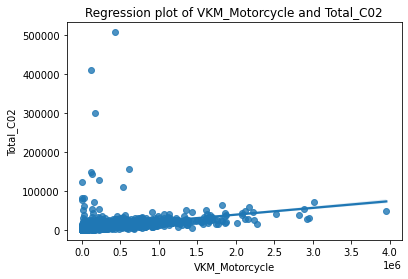

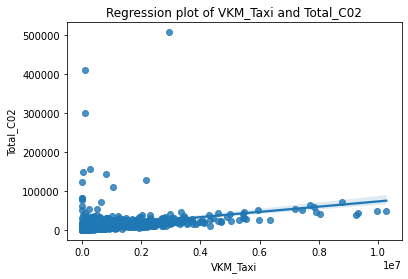

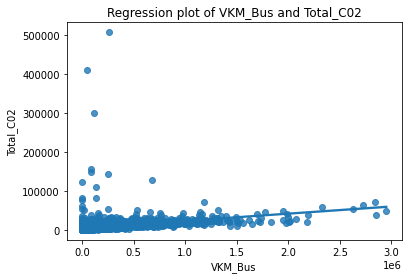

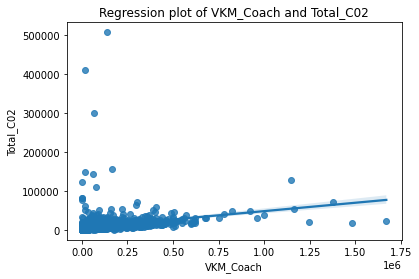

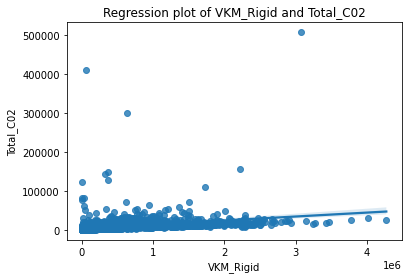

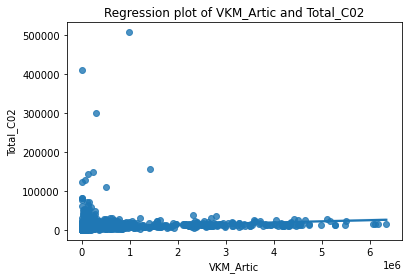

In [47]:
for var in variables:
    plt.figure()
    sns.regplot(x = var, y = 'Total_C02', data = df).set(title = f'Regression plot of {var} and Total_C02');

In [48]:
def iqr(df):
    for col in df.columns[~df.columns.isin(['Location_ExactCut_External','Location_ExactCut_Inner', 'Location_ExactCut_Outer'])]:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            S = 1.5*IQR
            LB = Q1 - S
            UB = Q3 + S
            df.loc[df[col] > UB,col] = UB
            df.loc[df[col] < LB,col] = LB

In [49]:
iqr(df)

In [50]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Total_C02,speed_kph,VKM_Motorcycle,VKM_Taxi,VKM_Bus,VKM_Coach,VKM_Rigid,VKM_Artic,VKM_Petrolcar,VKM_Dieselcar,VKM_Electriccar,VKM_Petrollgv,VKM_Diesellgv,VKM_Electriclgv,VKM_Total,Location_ExactCut_External,Location_ExactCut_Inner,Location_ExactCut_Outer
Total_C02,1.000000,-0.091673,0.779131,0.748390,0.717283,0.657991,0.710931,0.551223,0.714064,0.685679,0.685099,0.696882,0.709175,0.703349,0.726751,-0.210694,0.251448,-0.017093
speed_kph,-0.091673,1.000000,-0.061656,-0.129821,-0.393129,0.186976,0.274085,0.434307,0.281399,0.335324,-0.013239,0.319978,0.299530,-0.029948,0.288838,0.430445,-0.332201,-0.099644
VKM_Motorcycle,0.779131,-0.061656,1.000000,0.867499,0.683679,0.730383,0.796845,0.632722,0.774012,0.736334,0.772902,0.794514,0.810098,0.843666,0.789819,-0.188163,0.339646,-0.110101
VKM_Taxi,0.748390,-0.129821,0.867499,1.000000,0.679510,0.660395,0.726983,0.562218,0.662864,0.634977,0.647305,0.690653,0.703506,0.716582,0.692599,-0.253766,0.433293,-0.127702
VKM_Bus,0.717283,-0.393129,0.683679,0.679510,1.000000,0.429570,0.427316,0.240813,0.447978,0.398581,0.633408,0.413070,0.430343,0.651002,0.447428,-0.398934,0.361059,0.076043
VKM_Coach,0.657991,0.186976,0.730383,0.660395,0.429570,1.000000,0.805004,0.693991,0.817583,0.807829,0.633650,0.812538,0.819436,0.643936,0.832569,-0.076233,0.065128,0.002317
VKM_Rigid,0.710931,0.274085,0.796845,0.726983,0.427316,0.805004,1.000000,0.905261,0.921888,0.931404,0.690622,0.965226,0.966978,0.730561,0.953862,0.013493,0.118081,-0.104847
VKM_Artic,0.551223,0.434307,0.632722,0.562218,0.240813,0.693991,0.905261,1.000000,0.834552,0.860167,0.600494,0.887381,0.876559,0.626923,0.857517,0.127434,0.008849,-0.112794
VKM_Petrolcar,0.714064,0.281399,0.774012,0.662864,0.447978,0.817583,0.921888,0.834552,1.000000,0.985428,0.799721,0.954226,0.962739,0.764816,0.988255,0.029041,0.014695,-0.020549
VKM_Dieselcar,0.685679,0.335324,0.736334,0.634977,0.398581,0.807829,0.931404,0.860167,0.985428,1.000000,0.734418,0.970733,0.968935,0.701566,0.990535,0.064031,-0.001142,-0.040841


In [51]:
b = ((df.corr()['Total_C02'].sort_values(ascending = False)).round(2).to_frame()\
                            .rename(columns = {"Total_C02" : "Correlation_Coefficient"}))\
                            .iloc[1:]
b

,Correlation_Coefficient
VKM_Motorcycle,0.78
VKM_Taxi,0.75
VKM_Total,0.73
VKM_Bus,0.72
VKM_Petrolcar,0.71
VKM_Rigid,0.71
VKM_Diesellgv,0.71
VKM_Electriclgv,0.70
VKM_Petrollgv,0.70
VKM_Dieselcar,0.69


In [52]:
X = df.drop(['Total_C02', 'VKM_Total', 'speed_kph', 'Location_ExactCut_Outer', 'Location_ExactCut_Inner', 'Location_ExactCut_External', 'VKM_Taxi', 'VKM_Diesellgv', 'VKM_Electriclgv'], axis = 1)
y = df['Total_C02'].values

In [53]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [54]:
X.columns

Index(['VKM_Motorcycle', 'VKM_Bus', 'VKM_Coach', 'VKM_Rigid', 'VKM_Artic',
       'VKM_Petrolcar', 'VKM_Dieselcar', 'VKM_Electriccar', 'VKM_Petrollgv'],
      dtype='object')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 1337)

In [56]:
LR = LinearRegression()
LR.fit(X_train, y_train)
print(np.round(LR.score(X_test, y_test)*100, 1))

75.9


In [57]:
DT = DecisionTreeRegressor(random_state = 1337)
DT.fit(X_train, y_train)
print(np.round(DT.score(X_test, y_test)*100, 1))

56.0


In [58]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 1337)
RF.fit(X_train, y_train)
print(np.round(RF.score(X_test, y_test)*100, 1))

74.7


In [59]:
bag_model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 100, max_samples = 0.8, random_state = 1337)
bag_model.fit(X_train, y_train)
print(np.round(bag_model.score(X_test, y_test)*100, 1))

75.7


In [60]:
score = cross_val_score(LinearRegression(), X_std, y, cv = 5)
print(np.round(score.mean()*100, 1))

72.1


In [61]:
score = cross_val_score(DecisionTreeRegressor(random_state = 1337), X_std, y, cv = 5)
print(np.round(score.mean()*100, 1))

43.0


In [62]:
score = cross_val_score(RandomForestRegressor(n_estimators = 100, random_state = 1337), X_std, y, cv = 5)
print(np.round(score.mean()*100, 1))

70.4


In [63]:
score = cross_val_score(BaggingRegressor(DecisionTreeRegressor(), n_estimators = 100, max_samples = 0.8, random_state = 1337), X_std, y, cv = 5)
print(np.round(score.mean()*100, 1))

70.9


In [64]:
y_pred  = LR.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results = results[:100]

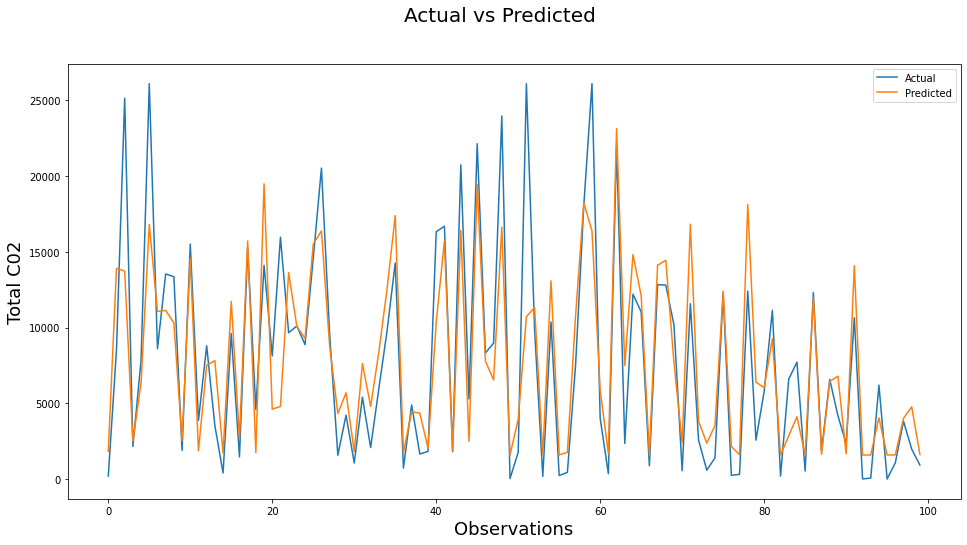

In [65]:
fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total C02',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])